<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/reaction_kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 

\begin{align}
    S + E \mathop{\ \longleftrightarrow\ }\limits^{k_1^+}_{k_1^-} SE \mathop{\ \longrightarrow\ }\limits^{k_2} P + E
\end{align}

\begin{align}
    s = [S],\quad e = [E],\quad c = [SE],\quad p = [P]
\end{align}

\begin{align}
    \frac{ds}{dt} = -k_1^+ es + k_1^-c, \qquad & \frac{de}{dt} = -k_1^+ es +( k_1^-+k_2)c \\
    \frac{dc}{dt} = k_1^+ es - (k_1^-+k_2)c, \qquad & \frac{dp}{dt} = k_2c \\
\end{align}

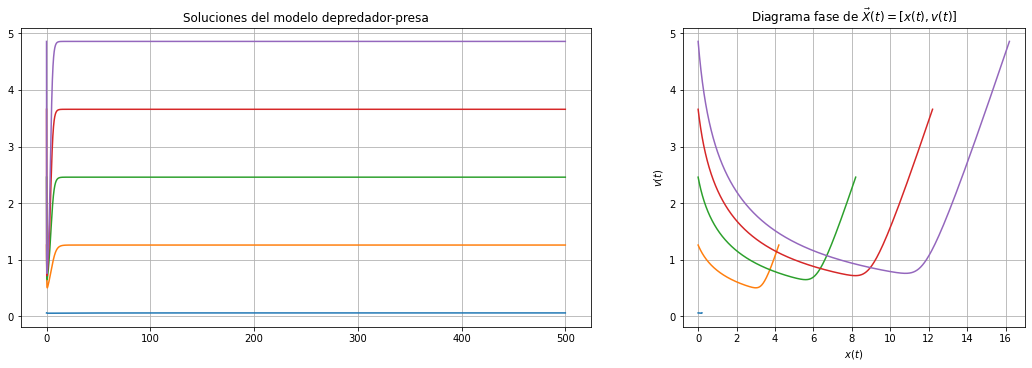

In [7]:
start=0; step=0.005; num=100000
t = np.arange(0,num)*step+start

# parámetros
k1 = 1;
m1 = 1;
k2 = 1;

def dX(X, t):
    s, e, c, p = X
    ds = - k1*e*s + m1*c;
    de = - k1*e*s + (m1+k2)*c;
    dc = + k1*e*s - (m1+k2)*c;
    dp = + k2*c;
    return np.array([ds, de, dc, dp])
X0 = np.array([10, 3, 0, 0])      # (s, e, c, p)

def RK_solver(X0, dX, t, equally_spaced=True):
    dims = len(X0)
    K = np.empty([4, dims])
    X = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        X[0, d] = X0[d]

    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    X = X[0:-1,:]
    return X

S = []
for i in range(5):
    S.append(RK_solver(((2*i+0.1)/5)*X0, dX, t))

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[5,3]), figsize=(18,5.5))
for i in range(len(S)):
    ax[0].plot(t,S[i][:,1])
ax[0].set_title(r"Soluciones del modelo depredador-presa")
# ax[0].legend(); 
ax[0].grid();

for i in range(len(S)):
    ax[1].plot(S[i][:,0], S[i][:,1])
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
# ax[1].legend(); 
ax[1].grid(); 
plt.show()

### **Angeli (2004)**

\begin{align}
    \dot{x_1} &= \alpha_1(1-x_1) - \frac{\beta_1x_1(\nu y_1)^{\gamma_1}}{K_1+(\nu y_1)^\gamma_1}\\
    \dot{y_1} &= \alpha_2(1-y_1) - \frac{\beta_2y_1 x_1^{\gamma_2}}{K_1+ x_1^{\gamma_1}}
\end{align}


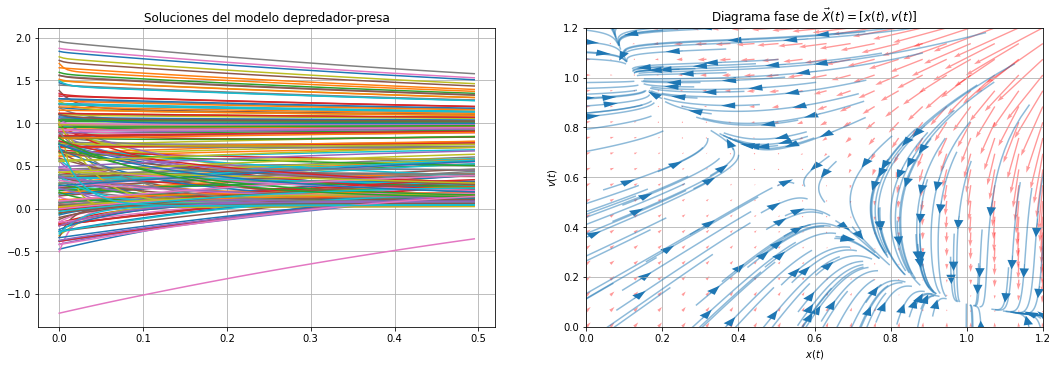

In [81]:
start=0; step=0.005; num=100
t = np.arange(0,num)*step+start

# parámetros
a1, a2 = 1, 1
b1, b2= 200, 10;
gamma1, gamma2 = 4, 4
k1, k2 = 30, 1;
nu = 1

def f_x(x, y):
    return a1*(1-x) - (b1*x*(nu*y)**gamma1)/(k1 + (nu*y)**gamma1)

def f_y(x, y):
    return a2*(1-y) - (b2*y*x**gamma2)/(k2 + y**gamma2)

def dX(X, t):
    x, y = X
    dx = f_x(x, y);
    dy = f_y(x, y);
    return np.array([dx, dy])

mu, sigma = 0.6, 0.5 # mean and standard deviation
X0 = np.random.normal(mu, sigma, size=(200, 2))

S = []
for i in range(len(X0)):
    S.append(RK_solver(X0[i], dX, t))

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[1,1]), figsize=(18,5.5))
for i in range(len(S)):
    ax[0].plot(t,S[i][:,1])
ax[0].set_title(r"Soluciones del modelo depredador-presa")
ax[0].grid();

num = 20
x, y = np.linspace(0,1.2, num), np.linspace(0,1.2, num)
x, y = np.meshgrid(x, y)
ax[1].quiver(x,y,
             (a1*(1-x) - (b1*x*(nu*y)**gamma1)/(k1 + (nu*y)**gamma1)),
             (a2*(1-y) - (b2*y*x**gamma2)/(k2 + y**gamma2)),
             alpha = 0.4, color="red")

for i in range(len(S)):
    ax[1].plot(S[i][:,0], S[i][:,1], linewidth=1.5, color="tab:blue", alpha = 0.5)
    ax[1].arrow(S[i][num//2,0], S[i][num//2,1], S[i][num//2+1,0]-S[i][num//2,0], S[i][num//2+1,1]-S[i][num//2,1], 
                linewidth=3, color="tab:blue", lw=0, head_width=.025)

ax[1].set_xlim([0, 1.2]); ax[1].set_ylim([0, 1.2])
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
# ax[1].legend(); 
ax[1].grid(); 
plt.show()

$\mathop{A}\limits_{e=1}^{m}$
$$\mathop{\ \longleftrightarrow\ }\limits^{k_1^+}_{k_1^-}$$